## Problem 1 - Linear Separability

### Answer 1.1

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')

No handles with labels found to put in legend.


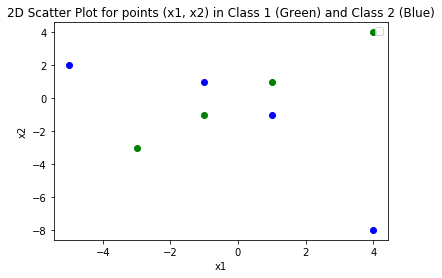

In [2]:
x_class_1 = np.array([-1, 1, -3, 4])
y_class_1 = np.array([-1, 1, -3, 4])

x_class_2 = np.array([-1, 1, -5, 4])
y_class_2 = np.array([1, -1, 2, -8])

plt.plot(x_class_1, y_class_1, 'o', color='green')
ax = plt.gca()
ax.set(xlabel="x1", ylabel = "x2")

plt.plot(x_class_2, y_class_2, 'o', color='blue')
ax = plt.gca()
ax.set(xlabel="x1", ylabel = "x2")

plt.title('2D Scatter Plot for points (x1, x2) in Class 1 (Green) and Class 2 (Blue)')
plt.legend()
plt.show()

Let the first set of points belongs to Class 1 and the other set belongs to Class 2.

Green points denote Class 1 while Blue Points denote Class 2. $x_1$ is the horizontal dimension while $x_2$ is the vertical one.

We can see from the plot above that the dataset $\text{IS NOT LINEARLY SEPARABLE}$ using any linear function/classifier, given only two features $ x_1$ and $x_2$ (without further transformation into a higher space). 


### Answer 1.2

Looking at the points from Class 1 and Class 2, we could see that:
1. $x_1$ and $x_2$ in Class 1 are of the same sign
2. $x_1$ and $x_2$ in Class 2 are of the opposite sign

Thus, we could propose some $z$ such as: $${z = x_1 * x_2}$$

This is linearly separable because Class 1 will all have positive values of $z$ while Class 2 will all have negative values of $z$.

### Answer 1.3

Suppose we have a 1D plane which plots $z$ for Class 1 and Class 2. Green lines denote Class 1 while Blue Points denote Class 2.

The separating hyperplane (or point, because this is 1D) is simply $z=c$, where $c$ is any constant satisfying $-1 < c < 1$. I pick $c=0$, which is denoted by the thick and short red line in the plot.

No handles with labels found to put in legend.


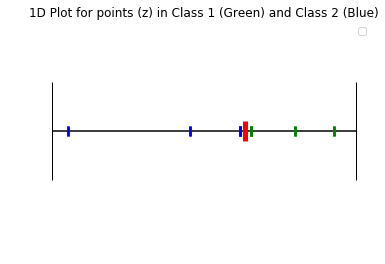

In [3]:
z_class_1 = np.multiply(x_class_1, y_class_1)
z_class_2 = np.multiply(x_class_2, y_class_2)

z_class_1 = np.repeat(z_class_1, 2)
z_class_2 = np.repeat(z_class_2, 2)

plt.figure()
plt.hlines(1, -35, 20)  

plt.eventplot(z_class_1, orientation='horizontal', colors='green', linelengths=0.1, linewidths=2.5)
plt.eventplot(z_class_2, orientation='horizontal', colors='blue', linelengths=0.1, linewidths=2.5)

plt.eventplot([-35, 20], orientation='horizontal', colors='black', linelengths=1, linewidths=1)
plt.eventplot([0], orientation='horizontal', colors='red', linelengths=0.2, linewidths=5)

plt.axis("off")

plt.title('1D Plot for points (z) in Class 1 (Green) and Class 2 (Blue)')
plt.legend()
plt.show()

### Answer for Problem 1.4

Because ...

## Problem 2 - Bias Variance Tradeoff, Regularization

### Answer 2.1

$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t(f(x_i) + \epsilon - g(x_i))^2] $$

Introduce terms $E[g(x_i]$ that will cancel each other:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i) + \epsilon - g(x_i) + E[g(x_i)] - E[g(x_i)])^2] $$

Using linearity in expectation:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + \frac{2}{t} \sum_{i=1}^t E[\epsilon(f(x_i) - E[g(x_i)])] + \frac{2}{t} \sum_{i=1}^t E[\epsilon(E[g(x_i)] - g(x_i))] + \frac{2}{t} \sum_{i=1}^t E[((f(x_i) - E[g(x_i))(E[g(x_i)] - g(x_i))]] $$

Notice that $E[g(x_i)] = g(x_i)$, so that lefts us with:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2]$$

Again, using linearity in expectation:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2] + E[\frac{1}{t} \sum_{i=1}^t E[\epsilon^2]] + E[\frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2]$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + \frac{1}{t}(t) E[\epsilon^2]$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + E[\epsilon^2]$$

Finally:
$$ E[MSE] = Bias[g(x)]^2 + Var[g(x)] + Noise $$

where:
1. $$ Bias[g(x)]^2 = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 $$
2. $$ Var[g(x)] = \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2 $$
3. $$ Noise = E[\epsilon^2] $$

### Answer 2.2

The black line plot depicts $f(x)$ while the red dots (20 in total) are the samples drawn from $y(x)$. 

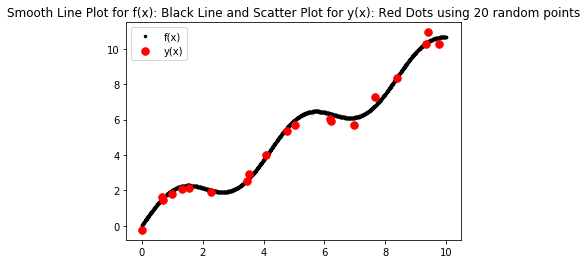

In [4]:
def f_x(x):
    return x + np.sin((3/2)*x)

x_smooth = np.arange(0, 10, 0.01)
f_x_plot_dots = f_x(x_smooth)

def generate_sample_from_y(x_rand):    
    return f_x(x_rand) + np.random.normal(0, 0.3, len(x_rand))
    
x_rand = np.random.uniform(0, 10, 20)
y_x_plot_dots = generate_sample_from_y(x_rand)


plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_rand, y_x_plot_dots, 'o', color='red', markersize=7.5, label='y(x)')

plt.title('Smooth Line Plot for f(x): Black Line and Scatter Plot for y(x): Red Dots using 20 random points')
plt.legend()
plt.show()

### Answer 2.3

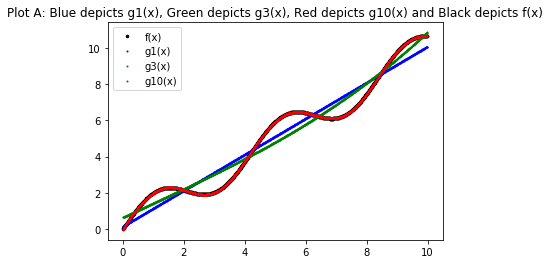

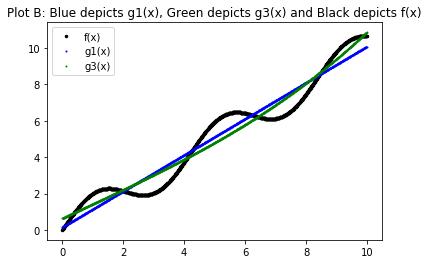

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

reshape_x_smooth = x_smooth.reshape(-1, 1)

g_1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
g_1.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

g_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
g_3.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

g_10 = make_pipeline(PolynomialFeatures(10), LinearRegression())
g_10.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_smooth, g_1.predict(reshape_x_smooth), 'o', color='blue', markersize=1, label='g1(x)')
plt.plot(x_smooth, g_3.predict(reshape_x_smooth), 'o', color='green', markersize=1, label='g3(x)')
plt.plot(x_smooth, g_10.predict(reshape_x_smooth), 'o', color='red', markersize=1, label='g10(x)')

plt.title('Plot A: Blue depicts g1(x), Green depicts g3(x), Red depicts g10(x) and Black depicts f(x)')
plt.legend()
plt.show()

plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_smooth, g_1.predict(reshape_x_smooth), 'o', color='blue', markersize=1, label='g1(x)')
plt.plot(x_smooth, g_3.predict(reshape_x_smooth), 'o', color='green', markersize=1, label='g3(x)')

plt.title('Plot B: Blue depicts g1(x), Green depicts g3(x) and Black depicts f(x)')
plt.legend()
plt.show()

In the first plot, Plot A, we can see that $g_1(x)$ (blue line) and $g_2(x)$ (green line) are underfitting while $g_{10}(x)$ (red line) is overfitting. $f(x)$, which is the black line, is fully overlayed by $g_{10}(x)$, the red line.

To make it clearer, I provide Plot B, in which I get ride of $g_10(x)$, i.e. the red line. We can compare that $g_10(x)$ resembles $f(x)$ quiet a lot, indicating overfitting.

### Answer 2.4

In [6]:
# Generate fixed 50 x_rand(s)
x_rand = np.random.uniform(0, 10, 50)

# Divide into x_train and x_test
x_train = x_rand[0:40]
x_test = x_rand[40:50]

# 
y_train = []
y_test = []

# Generate y_train and y_test

for i in range(0, 100):
    y_x_plot_dots = generate_sample_from_y(x_rand)
    y_train.append(y_x_plot_dots[0:40])
    y_test.append(y_x_plot_dots[40:50])

# for degree in range(1, 16):
#     g = make_pipeline(PolynomialFeatures(degree), LinearRegression())
#     g.fit(x_train, y_train)

### Answer 2.5

## Problem 3

### Answer 3.1

Two datasets picked:
    
1. Tic-Tac-Toe (https://www.openml.org/d/50)
2. Iris (https://www.openml.org/d/61)

In [7]:
import numpy as np
import pandas as pd

t_df = pd.read_csv("data/tic-tac-toe.csv")
t_df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [8]:
i_df = pd.read_csv("data/iris.csv")
i_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Function to Summarize Attributes from a Dataset

In [9]:
def get_attribute_summary(df, class_column):
    df_info = {}

    df_info["num_features"] = len(df.columns) - 1 # excluding label column
    df_info["num_instances"] = len(df)
    df_info["num_classes"] = len(np.unique(df[class_column]))

    df_info["num_numerical_features"] = 0
    df_info["num_categorical_features"] = 0

    sample_data = df.drop(columns=[class_column]).iloc[0]

    for val in sample_data:
        try:
            float_form = float(val)

            # If succeeds then it is a numerical object (int can also be converted to float)
            df_info["num_numerical_features"] = df_info["num_numerical_features"] + 1
        except:
            # Otherwise, it is a categorical feature
            df_info["num_categorical_features"] = df_info["num_categorical_features"] + 1

    # Some sanity check
    assert df_info["num_numerical_features"] + df_info["num_categorical_features"] == df_info["num_features"]

    print("Summary of Speed Dating dataset attributes: ")
    print("Number of features: {}".format(df_info["num_features"]))
    print("Number of instances: {}".format(df_info["num_instances"]))
    print("Number of classes: {}".format(df_info["num_classes"]))
    print("Number of numerical features: {}".format(df_info["num_numerical_features"]))
    print("Number of categorical features: {}".format(df_info["num_categorical_features"]))


#### Attribute Summary for Tic Tac Toe Dataset

In [10]:
get_attribute_summary(t_df, "Class")

Summary of Speed Dating dataset attributes: 
Number of features: 9
Number of instances: 958
Number of classes: 2
Number of numerical features: 0
Number of categorical features: 9


#### Attribute Summary for Iris Dataset

In [11]:
get_attribute_summary(i_df, "class")

Summary of Speed Dating dataset attributes: 
Number of features: 4
Number of instances: 150
Number of classes: 3
Number of numerical features: 4
Number of categorical features: 0


### Answer 3.2

#### Split Both Dataset into Train and Test

In [12]:
from sklearn.model_selection import train_test_split

t_X_train, t_X_test, t_y_train, t_y_test = train_test_split(t_df.drop(columns=["Class"]), t_df["Class"], test_size=0.2, random_state=28)
i_X_train, i_X_test, i_y_train, i_y_test = train_test_split(i_df.drop(columns=["class"]), i_df["class"], test_size=0.2, random_state=28)


#### Generate 10 Different Train Sets

In [13]:
def generate_ten_subsamples(X_train, y_train):
    X_train_sets = []
    y_train_sets = []
    
    for i in range(1, 10):
        frac = i * 10 / 100

        # Use the same random state so that we get matching X_train and y_train
        X_train_sets.append(X_train.sample(frac=frac, random_state=28))
        y_train_sets.append(y_train.sample(frac=frac, random_state=28))
        
    return X_train_sets, y_train_sets

t_X_train_sets, t_y_train_sets = generate_ten_subsamples(t_X_train, t_y_train)
i_X_train_sets, i_y_train_sets = generate_ten_subsamples(i_X_train, i_y_train)

#### Convert Categorical Features into Numerical Ones 

In [14]:
from sklearn.preprocessing import OneHotEncoder

#### Function to Train Dataset using Random Forests and Gradient Boosting

In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from datetime import datetime

def run_train_scenario(X_train_sets, y_train_sets):
    rf = RandomForestClassifier(random_state=28)
    gb = GradientBoostingClassifier(random_state=28)

    i = 0
    
    rf_models = []
    gb_models = []
    
    rf_training_times = []
    gb_training_times = []
    
    for X_train, y_train in list(zip(X_train_sets, y_train_sets)):
        start = datetime.now()
        rf.fit(X_train, y_train)
        rf_training_times.append(datetime.now() - start)
        rf_models.append(rf)
        
        start = datetime.now()
        gb.fit(X_train, y_train)
        gb_training_times.append(datetime.now() - start)
        gb_models.append(gb)
        
        i = i + 1
        total_time_elapsed = rf_training_times[len(rf_training_times) - 1] + gb_training_times[len(gb_training_times) - 1]
        print('Finished Iris training for subsample {}, total time elapsed: {}'.format(i, total_time_elapsed))
        
    return rf_models, gb_models, rf_training_times, gb_training_times

#### Run Training with Tic Tac Toe Dataset

In [16]:
# t_rf, t_gb, t_rf_training_times, t_gb_training_times = run_train_scenario(t_X_train_sets, t_y_train_sets)

#### Run Training with Iris Dataset

In [17]:
i_rf_models, i_gb_models, i_rf_training_times, i_gb_training_times = run_train_scenario(i_X_train_sets, i_y_train_sets)

Finished Iris training for subsample 1, total time elapsed: 0:00:00.188167
Finished Iris training for subsample 2, total time elapsed: 0:00:00.192869
Finished Iris training for subsample 3, total time elapsed: 0:00:00.297522
Finished Iris training for subsample 4, total time elapsed: 0:00:00.245859
Finished Iris training for subsample 5, total time elapsed: 0:00:00.177338
Finished Iris training for subsample 6, total time elapsed: 0:00:00.360466
Finished Iris training for subsample 7, total time elapsed: 0:00:00.416480
Finished Iris training for subsample 8, total time elapsed: 0:00:00.233081
Finished Iris training for subsample 9, total time elapsed: 0:00:00.266284


#### Create function to Compute Accuracies on Test Set

In [18]:
from sklearn.metrics import accuracy_score

def calculate_test_accuracies(clf_list, X_test, y_test):
    accuracies = []
    
    for clf in clf_list:
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        
    return accuracies

#### Compute Test Accuracies on Tic Tac Toe Dataset

In [ ]:
t_rf_accuracies = calculate_test_accuracies(t_rf_models, t_X_test, t_y_test)
t_gb_accuracies = calculate_test_accuracies(t_gb_models, t_X_test, t_y_test)
print(t_rf_accuracies)
print(t_gb_accuracies)

#### Compute Test Accuracy on Iris Dataset

In [19]:
i_rf_accuracies = calculate_test_accuracies(i_rf_models, i_X_test, i_y_test)
i_gb_accuracies = calculate_test_accuracies(i_gb_models, i_X_test, i_y_test)
print(i_rf_accuracies)
print(i_gb_accuracies)

[0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333] [0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


#### Plot Training Times and Accuracies for Iris Dataset

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 100, 10)
y_plots = i_rf_a
ax.plot(x_plots, y_plots, color='red')

ax.set_xlabel('Pixel Value')     
ax.set_ylabel('Frequency')     

ax.set_xlim(0, 0.05)
ax.set_ylim(-0.01, 0.04)

ax.set_title('Scatter Plot and the Hand-Drawn Classifier for Training Set')
ax.legend()
ax.grid(True)

plt.show()